# Importing libs #

In [2]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Image Processing #

## Reading Original Image ##

In [3]:
# Image path
folder_path = r'D:\Year3\Computer_Vision\College\Mid_Term_Exam\Original_Images'
sub_folder_objects_path = r'D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects'
file_path = r'D:\Year3\Computer_Vision\College\Mid_Term_Exam\Original_Images\finding_objects.jpg'

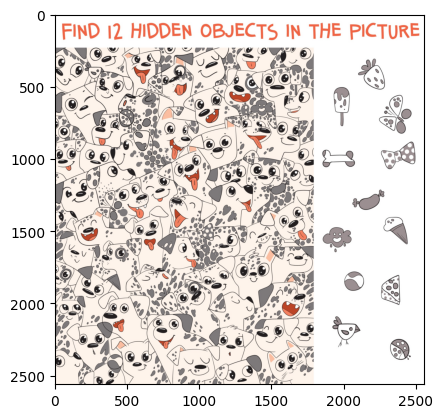

In [4]:
# Reading image 
image = cv2.imread(file_path)

"""
Showing image in true color
[:, :, ::-1]: This slicing operation is applied along the channel dimension:

    : → Selects all rows.

    : → Selects all columns.

    ::-1 → Reverses the order of the last dimension (color channels: BGR to RGB).
"""
plt.imshow(image[:, :, ::-1])

## Defining Regions: Main Part and Object Part ##

height: 2560
width: 2560
Main_image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Original_Images\main_image.jpg
objects_image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Original_Images\objects.jpg


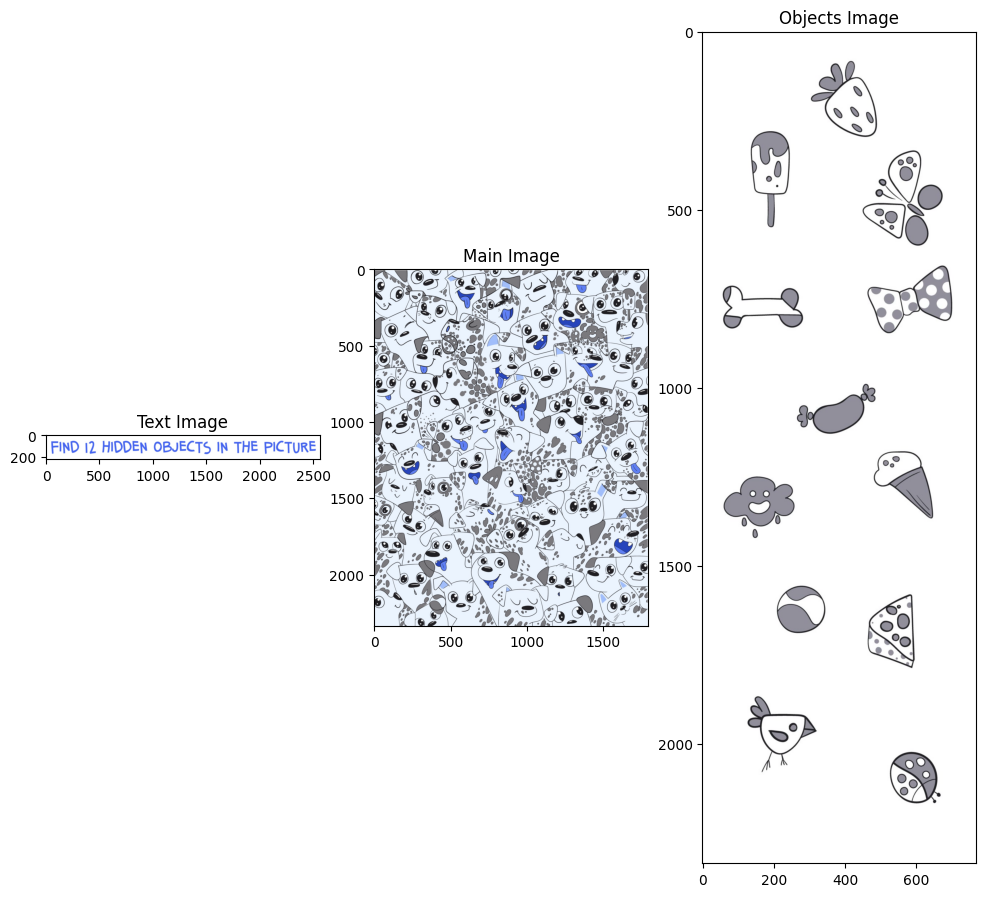

In [5]:
# Determine the dimensions 
height, width, _ = image.shape
print(f'height: {height}\nwidth: {width}')

# Manually define regions based on observed structure
text_zone_height = int(height * 0.088)
main_zone_width = int(width * 0.70)

# Extracting regions based on defined zones
text_image = image[:text_zone_height, :]
main_image = image[text_zone_height:, :main_zone_width]
objects_image = image[text_zone_height:, main_zone_width:]

# Displaying images in subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 12))

axes[0].set_title('Text Image')
axes[0].imshow(text_image)

axes[1].set_title('Main Image')
axes[1].imshow(main_image)

axes[2].set_title('Objects Image')
axes[2].imshow(objects_image)

# Saving images

# Define file paths for saving
main_image_path = os.path.join(folder_path, 'main_image.jpg')
objects_image_path = os.path.join(folder_path, 'objects.jpg')

# Saving images
cv2.imwrite(main_image_path, main_image)
print(f'Main_image saved to {main_image_path}')

cv2.imwrite(objects_image_path, objects_image)
print(f'objects_image saved to {objects_image_path}')

In [30]:
# main_image_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray', main_image_gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [31]:
# sigma = min(main_image_gray.shape) / 50
# radius = int(6 * sigma + 1)
# print(sigma, radius)

In [32]:
# main_image_blur = cv2.GaussianBlur(main_image_gray, (9, 9), 0)
# cv2.imshow('blur', main_image_blur)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [34]:
# # Showing images in gray scale and blurred mode
# fig, axes = plt.subplots(1, 2, figsize=(12, 12))
# axes[0].imshow(main_image_gray, cmap='gray')
# axes[1].imshow(main_image_blur, cmap='gray')

In [35]:
# plt.imshow(cv2.imread(objects_image_path, 0), cmap='gray')

## Isolating Objects ##

In [97]:
# Load the image in grayscale
img = cv2.imread(objects_image_path, cv2.IMREAD_GRAYSCALE)

threshold_value = 200

# Apply inverse binary thresholding with a tuned threshold value.
#If a pixel value in img is greater than 200, it is set to 0 (black).
#If a pixel value is less than or equal to 200, it is set to 255 (white).
_, binary = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Apply morphological closing with a larger kernel to connect object parts
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
binary_closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find connected components with statistics
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_closed, connectivity=8)

# Filter out small components (noise) based on area
min_area = 2000  # Adjust this value based on the size of your smallest object
filtered_labels = []
for i in range(1, num_labels):  # Skip background (label 0)
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= min_area:
        filtered_labels.append(i)

# Print the number of detected objects
print(f"Number of objects detected: {len(filtered_labels)}")

# Save each detected object as a separate image
for idx, i in enumerate(filtered_labels, start=1):
    # Get bounding box coordinates
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    
    # Crop the object from the original image
    object_img = img[y:y+h, x:x+w]
    
    object_path = os.path.join(sub_folder_objects_path, f'object_{idx}.jpg')
    # Save the cropped image
    cv2.imwrite(object_path, object_img)
    print(f'Image saved to {object_path}')

Number of objects detected: 12
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_1.jpg
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_2.jpg
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_3.jpg
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_4.jpg
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_5.jpg
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_6.jpg
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_7.jpg
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_8.jpg
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_9.jpg
Image saved to D:\Year3\Computer_Vision\College\Mid_Term_Exam\Detected_Objects\object_10.jpg
Image saved to D:\Year3\Computer_Vision\College\

In [37]:
# img = cv2.imread(objects_image_path, cv2.IMREAD_GRAYSCALE)

# # Apply inverse binary thresholding with a tuned threshold value
# # Adjust '200' based on your image (try 150–220)
# _, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
# plt.imshow(binary, cmap='gray')

In [38]:
# # Apply morphological closing with a larger kernel to connect object parts
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
# binary_closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
# plt.imshow(binary_closed, cmap='gray')

# Object Detection Strategy #

## Defining paths ##

In [6]:
# Main part
print(main_image_path)

D:\Year3\Computer_Vision\College\Mid_Term_Exam\Original_Images\main_image.jpg


In [7]:
object_names = [f"object_{index}" for index in range(1, 13)]
template_images_path = [os.path.join(sub_folder_objects_path, f"{name}.jpg") for name in object_names] # list of object path

## Strategy ##

### Loading and processing images ###

In [8]:
def load_images(main_image_path, template_images_path):
    """
    Load the main image and template images
    
    Args:
        main_image_path: Path to the main image with dalmatians
        template_images_path: List of paths to the 12 object templates
    
    Returns:
        main_img: The main image
        templates: List of template images
    """
    main_img = cv2.imread(main_image_path)
    main_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    
    templates = []
    for path in template_images_path:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        templates.append(img)
    
    return main_img, templates

In [9]:
def preprocess_images(main_img, templates):
    """
    Preprocess images for better feature detection
    
    Args:
        main_img: The main image
        templates: List of template images
    
    Returns:
        main_gray: Grayscale version of main image
        template_grays: List of grayscale template images
    """
    # Convert to grayscale
    main_gray = cv2.cvtColor(main_img, cv2.COLOR_RGB2GRAY)
    
    # Apply Gaussian blur to reduce noise
    main_gray = cv2.GaussianBlur(main_gray, (9, 9), 0)
    
    # Apply histogram equalization to enhance contrast
    main_gray = cv2.equalizeHist(main_gray)
    
    # Process template images
    template_grays = []
    for temp in templates:
        temp_gray = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)
        temp_gray = cv2.GaussianBlur(temp_gray, (3, 3), 0)
        temp_gray = cv2.equalizeHist(temp_gray)
        template_grays.append(temp_gray)
    
    return main_gray, template_grays

### Template Matching ##

In [56]:
import numpy as np
import cv2

def template_matching(main_gray, template_grays, object_names, threshold=0.4, min_scale=0.75, max_scale=0.95, scale_steps=30, scale_bias=1.0, verbose=True):
    """
    Perform template matching to locate objects in the main image with optimized performance.
    
    Args:
        main_gray: Grayscale main image where templates are searched.
        template_grays: List of grayscale template images to match against the main image.
        object_names: List of names corresponding to each template.
        threshold: Minimum confidence threshold for a match to be considered valid (default: 0.4).
        min_scale: Minimum scale factor for resizing templates (default: 0.75).
        max_scale: Maximum scale factor for resizing templates (default: 0.95).
        scale_steps: Number of steps between min_scale and max_scale (default: 30).
        scale_bias: Bias factor to adjust scale distribution (default: 1.0).
        verbose: If True, print progress and results (default: True).
    
    Returns:
        results: Dictionary containing detection results for each object, with details such as
                 found status, confidence, location, scale, width, and height.
    """
    results = {}
    h_main, w_main = main_gray.shape  # Get dimensions of the main image

    # Iterate over each template and its corresponding name
    for template_idx, (template, name) in enumerate(zip(template_grays, object_names)):
        if verbose:
            print(f"Searching for {name}...")

        # Initialize dictionary to store the best match details
        best_match = {'val': 0, 'loc': None, 'scale': 0, 'width': 0, 'height': 0, 'scale_idx': -1, 'raw_val': 0}
        h_template, w_template = template.shape  # Get dimensions of the current template

        # Skip if the template is larger than the main image
        if h_template > h_main or w_template > w_main:
            results[name] = {'found': False, 'confidence': 0}
            if verbose:
                print(f'Not found (too big): {name}')
            continue

        # Generate base scales linearly between min_scale and max_scale
        base_scales = np.linspace(min_scale, max_scale, scale_steps)
        # Apply scale bias if not 1.0 to adjust the distribution of scales
        if scale_bias != 1.0:
            scales = np.power(base_scales, scale_bias)
        else:
            scales = base_scales

        # Add additional fine scales in the range 0.75 to 0.9 for greater precision
        fine_scales = np.linspace(0.75, 0.9, 15)
        # Combine base and fine scales, sort them, and remove duplicates
        all_scales = np.sort(np.concatenate([scales, fine_scales]))
        all_scales = np.unique(all_scales)

        # Filter scales to ensure resized templates fit within the main image
        valid_scales = [scale for scale in all_scales if int(h_template * scale) <= h_main and int(w_template * scale) <= w_main]

        # Perform template matching at each valid scale to find the best match
        for i, scale in enumerate(valid_scales):
            width = int(w_template * scale)
            height = int(h_template * scale)
            resized_template = cv2.resize(template, (width, height), interpolation=cv2.INTER_AREA)
            res = cv2.matchTemplate(main_gray, resized_template, cv2.TM_CCOEFF_NORMED)
            _, max_val, _, max_loc = cv2.minMaxLoc(res)

            # Update best match if the current match value is higher
            if max_val > best_match['val']:
                best_match.update({'val': max_val, 'loc': max_loc, 'scale': scale, 'width': width, 'height': height, 'scale_idx': i, 'raw_val': max_val})

        # Verification step: refine the best match by checking nearby scales
        if best_match['val'] > 0:
            best_scale = best_match['scale']
            # Generate verification scales around the best scale
            verification_scales = [best_scale + offset for offset in [-0.04, -0.03, -0.02, -0.01, 0.01, 0.02, 0.03, 0.04] 
                                   if min_scale <= best_scale + offset <= max_scale]

            for scale in verification_scales:
                width = int(w_template * scale)
                height = int(h_template * scale)
                # Skip if resized template exceeds main image dimensions
                if height > h_main or width > w_main:
                    continue
                resized_template = cv2.resize(template, (width, height), interpolation=cv2.INTER_AREA)
                res = cv2.matchTemplate(main_gray, resized_template, cv2.TM_CCOEFF_NORMED)
                _, max_val, _, max_loc = cv2.minMaxLoc(res)

                # Apply a slight bias to favor larger scales
                scale_bias_factor = 1.0 + 0.05 * (scale - best_scale) / (max_scale - best_scale) if scale > best_scale else 1.0
                verification_val = max_val * scale_bias_factor

                # Update best match if verification yields a better result
                if verification_val > best_match['val']:
                    best_match.update({'val': verification_val, 'loc': max_loc, 'scale': scale, 'width': width, 'height': height, 'raw_val': max_val})

        # Determine final confidence and store results
        confidence = best_match.get('raw_val', 0)
        if confidence > threshold:
            results[name] = {
                'found': True,
                'confidence': confidence,
                'location': best_match['loc'],
                'scale': best_match['scale'],
                'width': best_match['width'],
                'height': best_match['height']
            }
            if verbose:
                print(f'Found: {name} (confidence: {confidence:.2f}, scale: {best_match["scale"]:.2f})')
        else:
            results[name] = {'found': False, 'confidence': confidence}
            if verbose:
                print(f'Not found: {name} (best confidence: {confidence:.2f})')

    return results

### Feature Matching ###

In [109]:
def feature_matching(main_gray, template_grays, object_names, min_match_count=10):
    """
    Perform feature-based matching using SIFT/ORB features
    
    Args:
        main_gray: Grayscale main image
        template_grays: List of grayscale template images
        object_names: Names of the objects to find
        min_match_count: Minimum number of feature matches required
    
    Returns:
        results: Dictionary of detection results
    """
    results = {}
    
    # Initialize ORB detector (SIFT is not freely available in all OpenCV builds)
    orb = cv2.ORB_create(nfeatures=1000)
    
    # Compute keypoints and descriptors for main image
    kp_main, des_main = orb.detectAndCompute(main_gray, None)
    
    # Use BFMatcher with default params
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    for idx, (template, name) in enumerate(zip(template_grays, object_names)):
        print(f"Feature matching for {name}...")
        
        # Find keypoints and descriptors for template
        kp_template, des_template = orb.detectAndCompute(template, None)
        
        if des_template is None or des_main is None:
            results[name] = {'found': False, 'reason': 'No features detected'}
            continue
        
        # Match descriptors
        matches = bf.match(des_template, des_main)
        
        # Sort them by distance
        matches = sorted(matches, key=lambda x: x.distance)
        
        if len(matches) > min_match_count:
            # Extract the matched keypoints
            src_pts = np.float32([kp_template[m.queryIdx].pt for m in matches[:min_match_count]]).reshape(-1, 1, 2)
            dst_pts = np.float32([kp_main[m.trainIdx].pt for m in matches[:min_match_count]]).reshape(-1, 1, 2)
            
            # Find homography
            H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
            
            if H is not None:
                # Get the corners of the template
                h, w = template.shape
                corners = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
                
                # Transform corners to find object in scene
                scene_corners = cv2.perspectiveTransform(corners, H)
                
                results[name] = {
                    'found': True,
                    'confidence': len(matches) / max(len(kp_template), 1),
                    'corners': scene_corners,
                    'matches': len(matches)
                }
                print(f'Found: {name}')
            else:
                results[name] = {
                    'found': False,
                    'reason': 'Could not find homography'
                }
        else:
            results[name] = {
                'found': False,
                'reason': f'Not enough matches - {len(matches)}/{min_match_count}'
            }
    
    return results

### Visualizing Results ###

In [57]:
def visualize_tm_results(main_img, tm_results, object_names):
    """
    Visualize the detection results
    
    Args:
        main_img: The main image
        final_results: Final results
        object_names: Names of the objects to find
    """
    # Create a copy of the main image for visualization
    result_img = main_img.copy()
    
    # Colors for different objects
    colors = [
        (0, 0, 255), (0, 0, 255), (0, 0, 255), (0, 0, 255),
        (0, 0, 255), (0, 0, 255), (0, 0, 255), (0, 0, 255),
        (0, 0, 255), (0, 0, 255), (0, 0, 255), (0, 0, 255)
    ]
    
    found_count = 0
    
    for idx, name in enumerate(object_names):
        result = tm_results.get(name, {})
        color = colors[idx % len(colors)]
        
        if result.get('found') is True:
            found_count += 1
            # details = result.get('details', {})
            # x, y = details.get('location', (0, 0))
            # w, h = details.get('width', 50), details.get('height', 50)
            x, y = result.get('location')
            w, h = result.get('width'), result.get('height')
            conf = result.get('confidence')
            scale = result.get('scale')
            print(f'Location of {name}: {x}, {y} with width and height: {w}, {h}. Confidence: {conf}. Scale: {scale}')
            
            # Draw rectangle
            cv2.rectangle(result_img, (x, y), (x + w, y + h), color, 5)
            
            # Add label
            cv2.putText(result_img, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 3)
    
    # Display summary statistics
    font = cv2.FONT_HERSHEY_SIMPLEX
    print(f"Found: {found_count}/12")
    
    # Display image
    plt.figure(figsize=(12, 12))
    plt.imshow(result_img)
    plt.title("Object Detection Results")
    plt.axis('off')
    plt.show()

In [119]:
def visualize_fm_results(main_img, fm_results, object_names):
    """
    Visualize the detection results
    
    Args:
        main_img: The main image
        final_results: Final results
        object_names: Names of the objects to find
    """
    # Create a copy of the main image for visualization
    result_img = main_img.copy()
    
    # Colors for different objects
    colors = [
        (0, 0, 255), (0, 0, 255), (0, 0, 255), (0, 0, 255),
        (0, 0, 255), (0, 0, 255), (0, 0, 255), (0, 0, 255),
        (0, 0, 255), (0, 0, 255), (0, 0, 255), (0, 0, 255)
    ]
    
    found_count = 0
    
    for idx, name in enumerate(object_names):
        result = fm_results.get(name, {})
        color = colors[idx % len(colors)]
        
        if result.get('found') is True:
            found_count += 1
            corners = result.get('corners')
            print(f'{name}: {corners}')
            
            if corners is not None:
                # Draw outline
                for i in range(4):
                    cv2.line(result_img, 
                            tuple(corners[i][0].astype(int)), 
                            tuple(corners[(i+1)%4][0].astype(int)), 
                            color, 5)
                
                # Add label near first corner
                cv2.putText(result_img, name, 
                            tuple(corners[0][0].astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 3)
    
    # Display summary statistics
    font = cv2.FONT_HERSHEY_SIMPLEX
    print(f"Found: {found_count}/12")
    
    # Display image
    plt.figure(figsize=(12, 12))
    plt.imshow(result_img)
    plt.title("Object Detection Results")
    plt.axis('off')
    plt.show()

### Main function ###

In [54]:
def main():
    main_img, templates = load_images(main_image_path ,template_images_path)
    main_gray, template_grays = preprocess_images(main_img, templates)
    tm_results = template_matching(main_gray, template_grays, object_names)
    visualize_tm_results(main_img, tm_results, object_names)

Searching for object_1...
Found: object_1 (confidence: 0.65, scale: 0.78)
Searching for object_2...
Found: object_2 (confidence: 0.64, scale: 0.78)
Searching for object_3...
Found: object_3 (confidence: 0.61, scale: 0.78)
Searching for object_4...
Found: object_4 (confidence: 0.48, scale: 0.78)
Searching for object_5...
Found: object_5 (confidence: 0.57, scale: 0.75)
Searching for object_6...
Found: object_6 (confidence: 0.59, scale: 0.75)
Searching for object_7...
Found: object_7 (confidence: 0.83, scale: 0.78)
Searching for object_8...
Found: object_8 (confidence: 0.51, scale: 0.76)
Searching for object_9...
Found: object_9 (confidence: 0.78, scale: 0.80)
Searching for object_10...
Found: object_10 (confidence: 0.70, scale: 0.78)
Searching for object_11...
Found: object_11 (confidence: 0.58, scale: 0.75)
Searching for object_12...
Found: object_12 (confidence: 0.63, scale: 0.79)
Location of object_1: 705, 1666 with width and height: 144, 166. Confidence: 0.652186930179596. Scale: 0.7

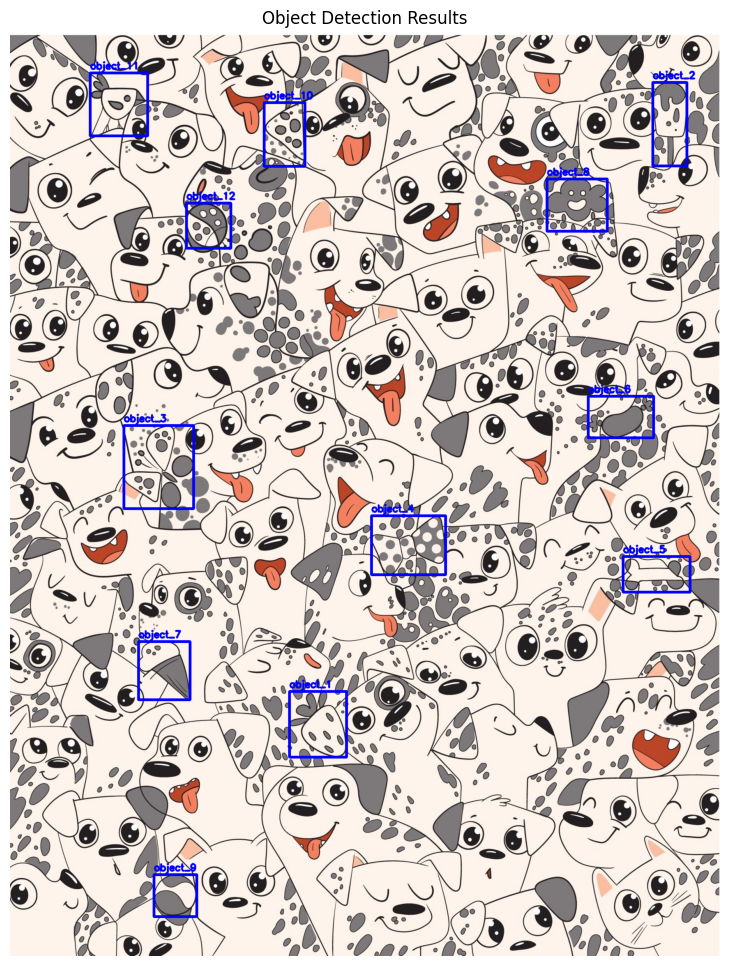

In [58]:
if __name__ == '__main__':
    main()